**Import necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

****

**Load the Dataset**

In [2]:
df = pd.read_csv('/content/realest.csv')


**Data Exploration & Cleaning**

In [3]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
df.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64


In [6]:
# Handling missing values by Removal and Imputation
df = df.drop(df.index[-1])           # remove last row (all null values)
df.fillna(df.mean(), inplace=True)
missing_values_after_imputation = df.isnull().sum()
print("Missing values per column after imputation:")
print(missing_values_after_imputation)

Missing values per column after imputation:
Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64


In [7]:
df.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
151,42.0,3.0,585.0,5.0,50.0,713.000000,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,911.707483,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.000000,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.000000,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.000000,2.0,1.0,0.0


In [8]:
# Check duplicate
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

Number of rows before removing duplicates: 156
Number of rows after removing duplicates: 156


**Exploratory Data Analysis (EDA)**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      156 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        156 non-null    float64
 5   Tax        156 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.1 KB


In [10]:
descriptive_stats = df.describe()
descriptive_stats

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,447.371284,1.675247,8.180476,430.202056,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,818.750000,5.000000,25.000000,674.250000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,1016.500000,6.000000,30.000000,845.500000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1183.000000,7.000000,35.500000,986.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


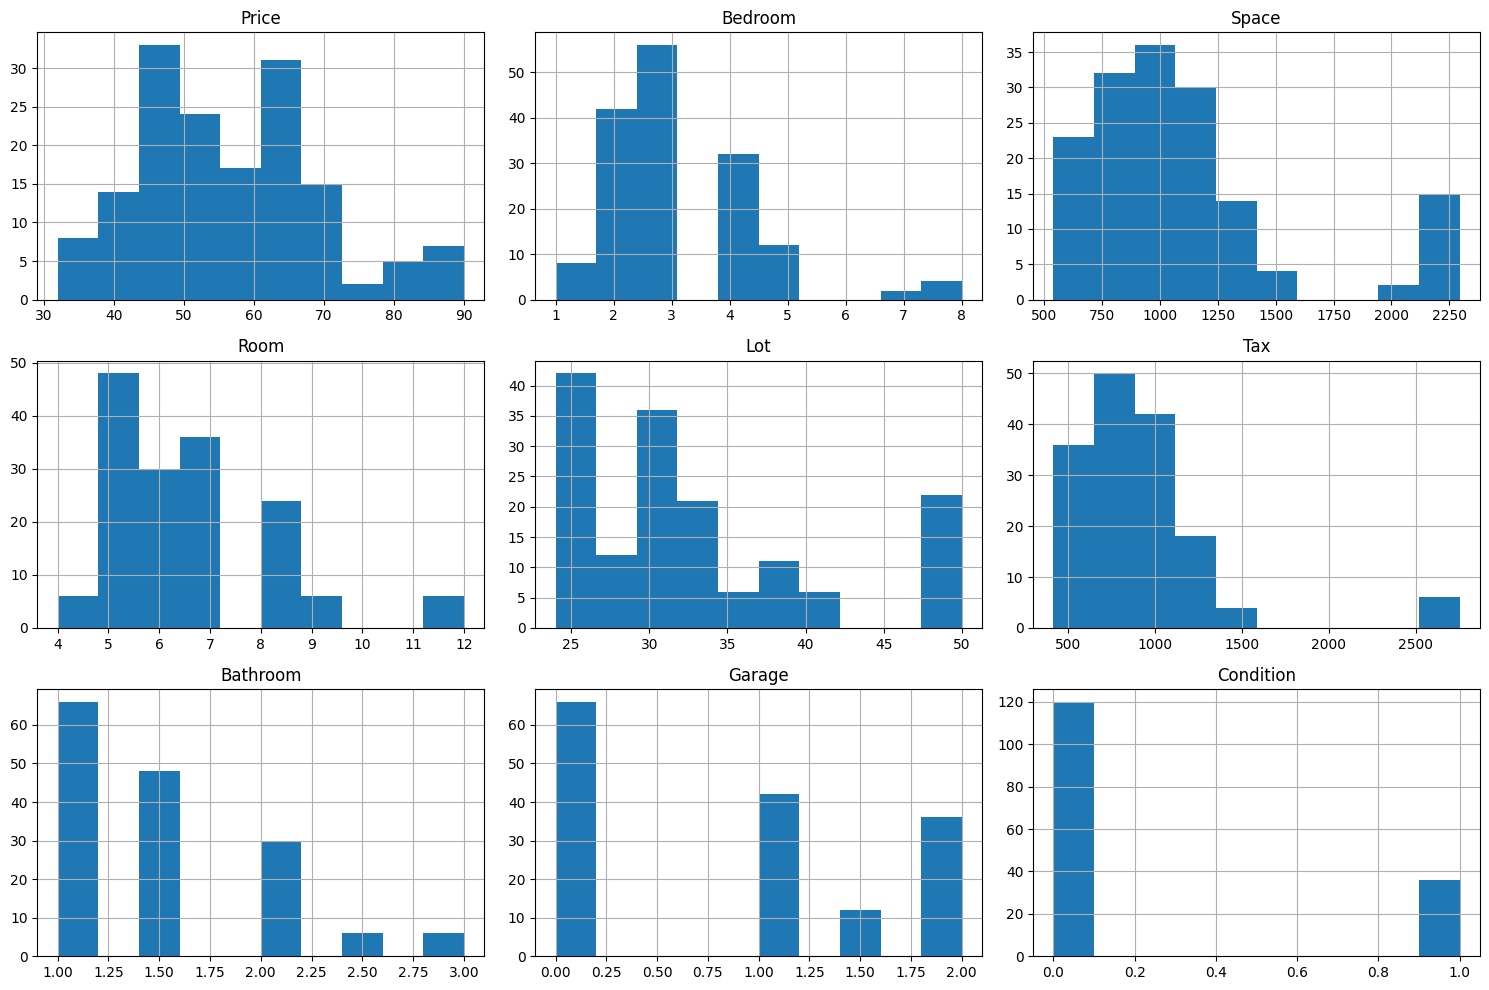

In [11]:
# Show Distribution of each variable
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

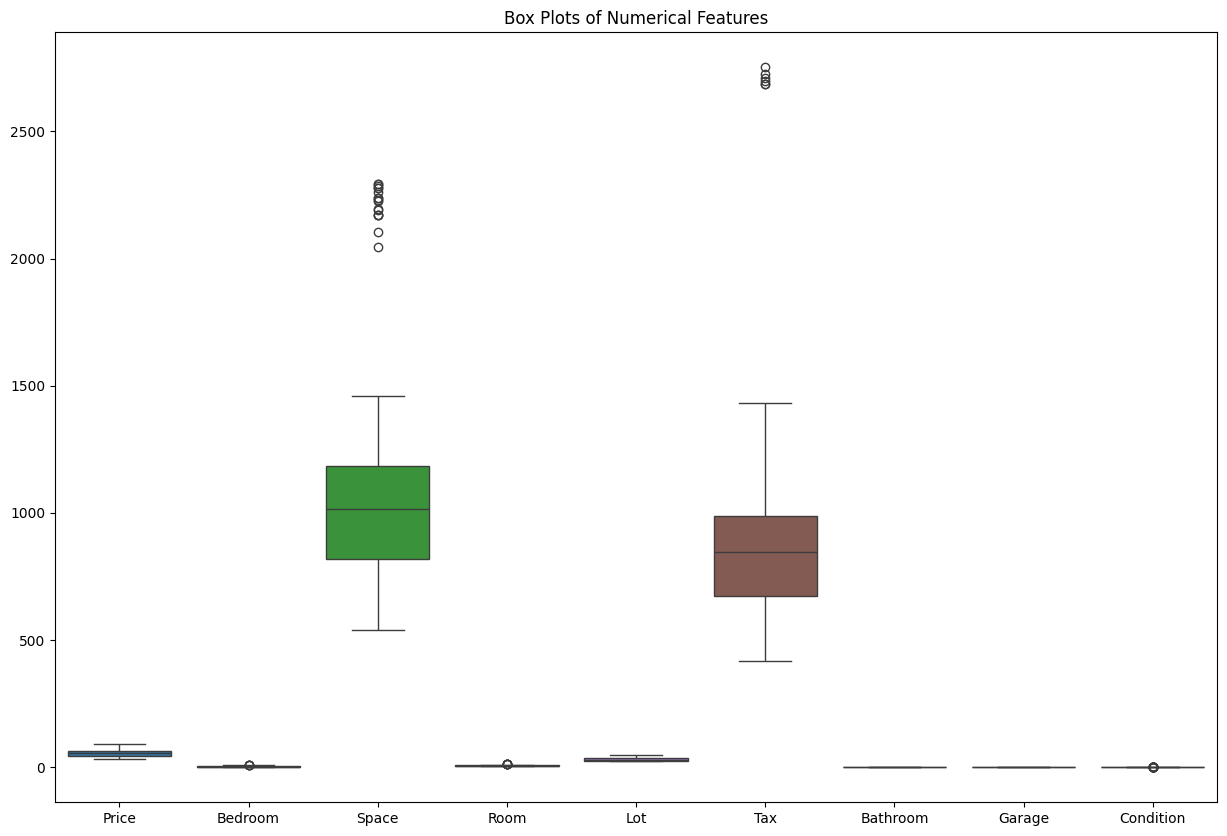

In [12]:
# Generate box plots for all numerical columns to identify potential outliers. bedroom, space,Room,Tax,
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Features')
plt.show()

In [13]:
def iqr_filter(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return (series < low) | (series > high)

outlier_flags = pd.DataFrame({col: iqr_filter(df[col]) for col in ['Price','Bedroom','Space','Lot','Room','Tax','Bathroom','Garage']})
print("Number of outliers per column:")
display(outlier_flags.sum())

Number of outliers per column:


,0
Price,0
Bedroom,4
Space,17
Lot,0
Room,6
Tax,6
Bathroom,0
Garage,0


In [14]:
# Option 1 for handling outliers by Removing Rows contains outlier values
df_cleaned_removed = df[~outlier_flags.any(axis=1)].copy()
print(f"Shape of DataFrame after removing outliers: {df_cleaned_removed.shape}")

Shape of DataFrame after removing outliers: (138, 9)


In [15]:
# Option 2 for handling outliers by Imputate them by Mean or Medien.
df_cleaned_imputed = df.copy()

for col in outlier_flags.columns:
    if outlier_flags[col].sum() > 0:
        median_value = df[col].mean()
        df_cleaned_imputed.loc[outlier_flags[col], col] = median_value

print("First few rows of the DataFrame after imputing outliers:")
display(df_cleaned_imputed.head())
print(f"Shape of DataFrame after imputing outliers: {df_cleaned_imputed.shape}")

First few rows of the DataFrame after imputing outliers:


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


Shape of DataFrame after imputing outliers: (156, 9)


In [16]:
# Choose method of them (Imputated)
df_final = df_cleaned_imputed.copy()
print("Head of the final DataFrame:")
display(df_final.head())
print(f"Shape of the final DataFrame: {df_final.shape}")

Head of the final DataFrame:


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


Shape of the final DataFrame: (156, 9)


In [17]:
outlier_flags = pd.DataFrame({col: iqr_filter(df_final[col]) for col in ['Price','Bedroom','Space','Lot','Room','Bathroom','Garage']})
print("Outliers Removed Sucessfully:")
display(outlier_flags.sum())

Outliers Removed Sucessfully:


,0
Price,0
Bedroom,0
Space,0
Lot,0
Room,0
Bathroom,0
Garage,0


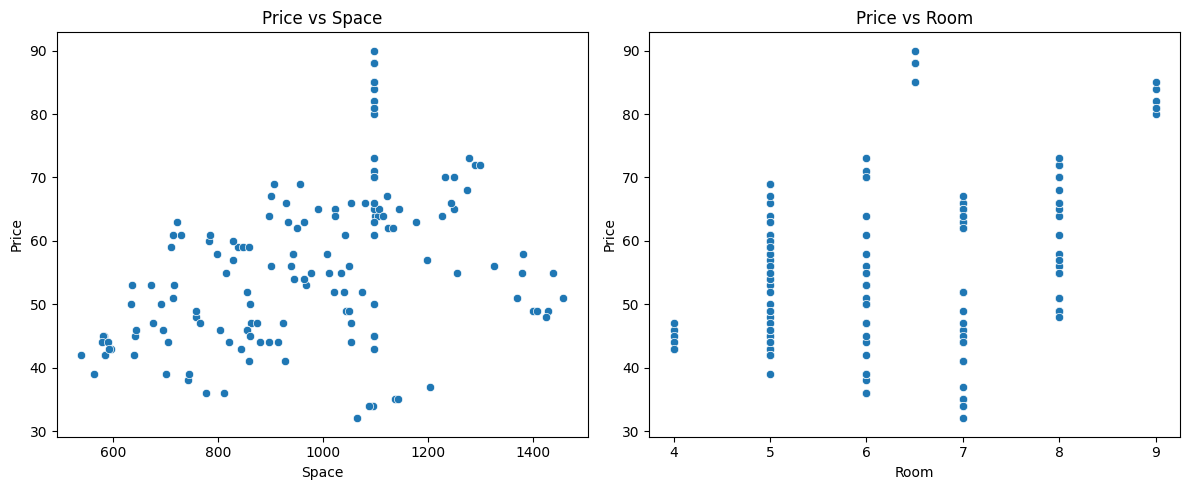

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Space', y='Price', data=df_final)
plt.title('Price vs Space')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Room', y='Price', data=df_final)
plt.title('Price vs Room')

plt.tight_layout()
plt.show()

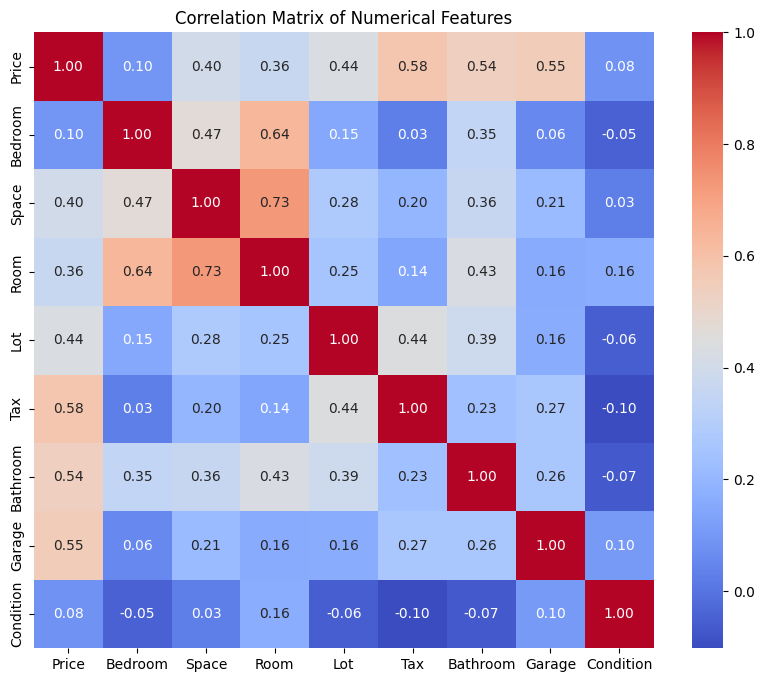

In [19]:
# understand the relationships between numerical variables.
correlation_matrix = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Feature Engineering (Normalize or standardize features)**

In [20]:
# Select numerical columns for scaling (excluding 'Condition' which is likely a categorical or binary feature)
numerical_cols = ['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled = df_final.copy() # Create a copy to avoid modifying the original dataframe
df_scaled[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

import joblib

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Download model
from google.colab import files
files.download('scaler.pkl')

print("First few rows of the scaled DataFrame:")
display(df_scaled.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First few rows of the scaled DataFrame:


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,-0.955395,-0.038223,-1.024963,0.759335,-0.815424,0.036442,0.0,0.0
1,55.0,-0.955395,-0.739378,-1.024963,0.023519,0.674089,-0.911051,2.0,1.0
2,56.0,-0.039156,-0.347285,-1.024963,0.268791,0.233227,0.036442,1.0,0.0
3,58.0,-0.039156,0.146291,-0.229469,-1.080204,0.520001,0.036442,2.0,0.0
4,64.0,-0.039156,0.575287,0.566025,2.108331,1.097830,0.036442,1.5,0.0


**Define Features (X) and Target (Y) and Split Data**

In [21]:
# Define features (X) and target (Y)
X = df_scaled.drop('Price', axis=1)  # Features are all columns except 'Price'
y = df_scaled[['Price']] # Target is the 'Price' column

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (148, 8)
Shape of X_test: (8, 8)
Shape of y_train: (148, 1)
Shape of y_test: (8, 1)


**Model Training using (Linear Regression)**

**Model Training and Evaluation using Linear Regression**

In [22]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")    # % of the variance in house prices can be explained by the features in the model

Mean Squared Error (MSE): 16.01
Root Mean Squared Error (RMSE): 4.00
Mean Absolute Error (MAE): 3.38
R-squared (R2): 0.84


In [25]:
import joblib

# Save model
joblib.dump(model, 'model.pkl')

# Download model
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>